In [176]:
import pandas as pd

In [177]:
workhr_World_df = pd.read_csv('../data/Worlds occupation vs working Hours.csv')
workhr_World_df.head()

/var/folders/q1/kx11j8ln18l7hx1kpcdc13l80000gn/T/ipykernel_26001/3888042221.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  workhr_World_df = pd.read_csv('../data/Worlds occupation vs working Hours.csv')


,ref_area.label,source.label,indicator.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): Total,2021,39.62,NaN,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...
1,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): 1. Managers,2021,44.84,NaN,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): 2. Professionals,2021,32.56,NaN,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...
3,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): 3. Technicians and assoc...,2021,40.29,NaN,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...
4,Afghanistan,LFS - Labour Force Survey,Mean weekly hours actually worked per employed...,Sex: Total,"Age (Youth, adults): 15+",Occupation (ISCO-08): 4. Clerical support workers,2021,40.08,Unreliable,NaN,Job coverage: Main job currently held,Repository: ILO-STATISTICS - Micro data proces...


In [178]:
workhr_World_df = workhr_World_df[workhr_World_df['classif1.label'] == "Age (Aggregate bands): Total"]
workhr_World_df.drop(columns=['source.label','indicator.label','classif1.label','obs_status.label','note_classif.label','note_indicator.label','note_source.label'], inplace = True)
workhr_World_df.head()

,ref_area.label,sex.label,classif2.label,time,obs_value
92,Afghanistan,Sex: Total,Occupation (ISCO-08): Total,2021,39.62
93,Afghanistan,Sex: Total,Occupation (ISCO-08): 1. Managers,2021,44.84
94,Afghanistan,Sex: Total,Occupation (ISCO-08): 2. Professionals,2021,32.56
95,Afghanistan,Sex: Total,Occupation (ISCO-08): 3. Technicians and assoc...,2021,40.29
96,Afghanistan,Sex: Total,Occupation (ISCO-08): 4. Clerical support workers,2021,40.08


In [179]:
workhr_World_df['classif2.label'] = workhr_World_df['classif2.label'].str.split(':')
workhr_World_df['classif2.label'] = workhr_World_df['classif2.label'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
workhr_World_df["classif2.label"] = workhr_World_df["classif2.label"].str.strip().str.replace(r"^\d+\.\s*", "", regex=True)

In [180]:
workhr_World_df.head()

,ref_area.label,sex.label,classif2.label,time,obs_value
92,Afghanistan,Sex: Total,Total,2021,39.62
93,Afghanistan,Sex: Total,Managers,2021,44.84
94,Afghanistan,Sex: Total,Professionals,2021,32.56
95,Afghanistan,Sex: Total,Technicians and associate professionals,2021,40.29
96,Afghanistan,Sex: Total,Clerical support workers,2021,40.08


In [181]:
workhr_World_df['sex.label'] = workhr_World_df['sex.label'].str.split(':')
workhr_World_df['sex.label'] = workhr_World_df['sex.label'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
workhr_World_df.head()

,ref_area.label,sex.label,classif2.label,time,obs_value
92,Afghanistan,Total,Total,2021,39.62
93,Afghanistan,Total,Managers,2021,44.84
94,Afghanistan,Total,Professionals,2021,32.56
95,Afghanistan,Total,Technicians and associate professionals,2021,40.29
96,Afghanistan,Total,Clerical support workers,2021,40.08


In [182]:
workhr_World_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35684 entries, 92 to 279523
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area.label  35684 non-null  object 
 1   sex.label       35684 non-null  object 
 2   classif2.label  35684 non-null  object 
 3   time            35684 non-null  int64  
 4   obs_value       35369 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ MB


In [183]:
workhr_World_df.isnull().sum()

ref_area.label      0
sex.label           0
classif2.label      0
time                0
obs_value         315
dtype: int64

In [184]:
workhr_World_df['obs_value'] = workhr_World_df.groupby('ref_area.label')['obs_value'].transform(lambda x: x.fillna(x.mean()))

In [185]:
workhr_World_df.isnull().sum()

ref_area.label    0
sex.label         0
classif2.label    0
time              0
obs_value         0
dtype: int64

In [186]:
earning_World_df = pd.read_csv("../data/World occupation vs salary.csv")

In [187]:
earning_World_df.head()

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Aruba,PC - Population and Housing Census,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): 1. Managers,Currency: U.S. dollars,2010,3364.246,NaN,NaN,Job coverage: Main job currently held | Workin...,Data reference period: September
1,Aruba,PC - Population and Housing Census,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): 2. Professionals,Currency: U.S. dollars,2010,2862.011,NaN,NaN,Job coverage: Main job currently held | Workin...,Data reference period: September
2,Aruba,PC - Population and Housing Census,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): 3. Technicians and assoc...,Currency: U.S. dollars,2010,2218.994,NaN,NaN,Job coverage: Main job currently held | Workin...,Data reference period: September
3,Aruba,PC - Population and Housing Census,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): 4. Clerical support workers,Currency: U.S. dollars,2010,1560.335,NaN,NaN,Job coverage: Main job currently held | Workin...,Data reference period: September
4,Aruba,PC - Population and Housing Census,Average monthly earnings of employees by sex a...,Sex: Total,Occupation (ISCO-08): 5. Service and sales wor...,Currency: U.S. dollars,2010,1186.592,NaN,NaN,Job coverage: Main job currently held | Workin...,Data reference period: September


In [188]:
earning_World_df.drop(columns=['source.label','indicator.label','classif2.label','obs_status.label','note_classif.label','note_indicator.label','note_source.label'], inplace = True)

In [189]:
earning_World_df['classif1.label'] = earning_World_df['classif1.label'].str.split(':')
earning_World_df['classif1.label'] = earning_World_df['classif1.label'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
earning_World_df["classif1.label"] = earning_World_df["classif1.label"].str.strip().str.replace(r"^\d+\.\s*", "", regex=True)

In [190]:
earning_World_df.head()

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Aruba,Sex: Total,Managers,2010,3364.246
1,Aruba,Sex: Total,Professionals,2010,2862.011
2,Aruba,Sex: Total,Technicians and associate professionals,2010,2218.994
3,Aruba,Sex: Total,Clerical support workers,2010,1560.335
4,Aruba,Sex: Total,Service and sales workers,2010,1186.592


In [191]:
earning_World_df['sex.label'] = earning_World_df['sex.label'].str.split(':')
earning_World_df['sex.label'] = earning_World_df['sex.label'].apply(lambda x: x[1] if isinstance(x, list) and len(x)>1 else None)

In [192]:
earning_World_df.head()

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Aruba,Total,Managers,2010,3364.246
1,Aruba,Total,Professionals,2010,2862.011
2,Aruba,Total,Technicians and associate professionals,2010,2218.994
3,Aruba,Total,Clerical support workers,2010,1560.335
4,Aruba,Total,Service and sales workers,2010,1186.592


In [193]:
earning_World_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45504 entries, 0 to 45503
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area.label  45504 non-null  object 
 1   sex.label       45504 non-null  object 
 2   classif1.label  45504 non-null  object 
 3   time            45504 non-null  int64  
 4   obs_value       45504 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ MB


In [194]:
earning_World_df.isnull().sum()

ref_area.label    0
sex.label         0
classif1.label    0
time              0
obs_value         0
dtype: int64

In [195]:
nepal_earning_df = earning_World_df[earning_World_df['ref_area.label']=='Nepal']
nepal_earning_df.shape[0]

62

In [196]:
nepal_workhr_df = workhr_World_df[workhr_World_df['ref_area.label'] == 'Nepal']
nepal_workhr_df.shape[0]

33

In [197]:
workhr_World_df = workhr_World_df.rename(columns={'obs_value':'working_hours', 'classif2.label':'occupation'})
earning_World_df = earning_World_df.rename(columns = {'obs_value':'earnings', 'classif1.label':'occupation'})

combined_df = pd.merge(
    workhr_World_df,
    earning_World_df,
    on=['ref_area.label', 'sex.label', 'occupation', 'time'],
    how='inner'  
)

In [198]:
combined_df.head()

,ref_area.label,sex.label,occupation,time,working_hours,earnings
0,Afghanistan,Total,Managers,2020,49.43,238.742
1,Afghanistan,Total,Professionals,2020,34.70,161.891
2,Afghanistan,Total,Technicians and associate professionals,2020,44.66,166.590
3,Afghanistan,Total,Clerical support workers,2020,46.24,209.459
4,Afghanistan,Total,Service and sales workers,2020,52.77,143.978


In [199]:
combined_df['hourly_earning'] = combined_df['earnings']/combined_df['working_hours']
combined_df.head()

,ref_area.label,sex.label,occupation,time,working_hours,earnings,hourly_earning
0,Afghanistan,Total,Managers,2020,49.43,238.742,4.829901
1,Afghanistan,Total,Professionals,2020,34.70,161.891,4.665447
2,Afghanistan,Total,Technicians and associate professionals,2020,44.66,166.590,3.730184
3,Afghanistan,Total,Clerical support workers,2020,46.24,209.459,4.529823
4,Afghanistan,Total,Service and sales workers,2020,52.77,143.978,2.728406


In [200]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24700 entries, 0 to 24699
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area.label  24700 non-null  object 
 1   sex.label       24700 non-null  object 
 2   occupation      24700 non-null  object 
 3   time            24700 non-null  int64  
 4   working_hours   24700 non-null  float64
 5   earnings        24700 non-null  float64
 6   hourly_earning  24700 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.3+ MB


In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
features = combined_df[['working_hours','earnings','hourly_earning']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [203]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

combined_df['cluster'] = clusters


In [204]:
combined_df.head()

,ref_area.label,sex.label,occupation,time,working_hours,earnings,hourly_earning,cluster
0,Afghanistan,Total,Managers,2020,49.43,238.742,4.829901,1
1,Afghanistan,Total,Professionals,2020,34.70,161.891,4.665447,0
2,Afghanistan,Total,Technicians and associate professionals,2020,44.66,166.590,3.730184,1
3,Afghanistan,Total,Clerical support workers,2020,46.24,209.459,4.529823,1
4,Afghanistan,Total,Service and sales workers,2020,52.77,143.978,2.728406,1


In [205]:
combined_df.groupby('cluster')[['working_hours', 'earnings', 'hourly_earning']].mean()

,working_hours,earnings,hourly_earning
cluster,,,
0,36.927327,1234.192430,33.631247
1,46.365318,553.299492,12.030466
2,37.319159,5565.180266,148.402132


In [206]:
nepal_df = combined_df[combined_df['ref_area.label'] == 'Nepal']
nepal_df

,ref_area.label,sex.label,occupation,time,working_hours,earnings,hourly_earning,cluster
17665,Nepal,Total,Managers,2017,44.23,318.094,7.191816,1
17666,Nepal,Total,Professionals,2017,37.86,201.557,5.323745,0
17667,Nepal,Total,Technicians and associate professionals,2017,42.10,236.904,5.627173,1
17668,Nepal,Total,Clerical support workers,2017,40.88,154.632,3.782583,1
17669,Nepal,Total,Service and sales workers,2017,44.12,135.147,3.063169,1
17670,Nepal,Total,"Skilled agricultural, forestry and fishery wor...",2017,31.34,126.862,4.047926,0
17671,Nepal,Total,Craft and related trades workers,2017,43.28,205.286,4.743207,1
17672,Nepal,Total,"Plant and machine operators, and assemblers",2017,48.48,166.524,3.434901,1
17673,Nepal,Total,Elementary occupations,2017,40.70,130.323,3.202039,1
17674,Nepal,Total,Armed forces occupations,2017,48.79,208.330,4.269932,1


In [207]:
duplicates = nepal_df[nepal_df.duplicated()]
duplicates

,ref_area.label,sex.label,occupation,time,working_hours,earnings,hourly_earning,cluster


In [208]:
nepal_df = nepal_df.drop_duplicates()
nepal_df

,ref_area.label,sex.label,occupation,time,working_hours,earnings,hourly_earning,cluster
17665,Nepal,Total,Managers,2017,44.23,318.094,7.191816,1
17666,Nepal,Total,Professionals,2017,37.86,201.557,5.323745,0
17667,Nepal,Total,Technicians and associate professionals,2017,42.10,236.904,5.627173,1
17668,Nepal,Total,Clerical support workers,2017,40.88,154.632,3.782583,1
17669,Nepal,Total,Service and sales workers,2017,44.12,135.147,3.063169,1
17670,Nepal,Total,"Skilled agricultural, forestry and fishery wor...",2017,31.34,126.862,4.047926,0
17671,Nepal,Total,Craft and related trades workers,2017,43.28,205.286,4.743207,1
17672,Nepal,Total,"Plant and machine operators, and assemblers",2017,48.48,166.524,3.434901,1
17673,Nepal,Total,Elementary occupations,2017,40.70,130.323,3.202039,1
17674,Nepal,Total,Armed forces occupations,2017,48.79,208.330,4.269932,1


In [209]:
nepal_df_cluster_0 = nepal_df[nepal_df['cluster'] == 0]
nepal_df_cluster_0

,ref_area.label,sex.label,occupation,time,working_hours,earnings,hourly_earning,cluster
17666,Nepal,Total,Professionals,2017,37.86,201.557,5.323745,0
17670,Nepal,Total,"Skilled agricultural, forestry and fishery wor...",2017,31.34,126.862,4.047926,0
17676,Nepal,Male,Professionals,2017,38.25,245.756,6.424993,0
17680,Nepal,Male,"Skilled agricultural, forestry and fishery wor...",2017,33.87,130.507,3.853174,0
17686,Nepal,Female,Professionals,2017,37.31,141.058,3.780702,0
17687,Nepal,Female,Technicians and associate professionals,2017,40.05,208.953,5.217303,0
17688,Nepal,Female,Clerical support workers,2017,40.22,143.029,3.556166,0
17689,Nepal,Female,Service and sales workers,2017,39.34,101.232,2.573259,0
17690,Nepal,Female,"Skilled agricultural, forestry and fishery wor...",2017,29.47,122.622,4.160909,0
17691,Nepal,Female,Craft and related trades workers,2017,32.75,150.087,4.582809,0


In [210]:
nepal_df_cluster_1 = nepal_df[nepal_df['cluster'] == 1]
nepal_df_cluster_1

,ref_area.label,sex.label,occupation,time,working_hours,earnings,hourly_earning,cluster
17665,Nepal,Total,Managers,2017,44.23,318.094,7.191816,1
17667,Nepal,Total,Technicians and associate professionals,2017,42.10,236.904,5.627173,1
17668,Nepal,Total,Clerical support workers,2017,40.88,154.632,3.782583,1
17669,Nepal,Total,Service and sales workers,2017,44.12,135.147,3.063169,1
17671,Nepal,Total,Craft and related trades workers,2017,43.28,205.286,4.743207,1
17672,Nepal,Total,"Plant and machine operators, and assemblers",2017,48.48,166.524,3.434901,1
17673,Nepal,Total,Elementary occupations,2017,40.70,130.323,3.202039,1
17674,Nepal,Total,Armed forces occupations,2017,48.79,208.330,4.269932,1
17675,Nepal,Male,Managers,2017,43.85,326.869,7.454253,1
17677,Nepal,Male,Technicians and associate professionals,2017,43.02,252.073,5.859437,1


In [211]:
nepal_df_cluster_2 = nepal_df[nepal_df['cluster'] == 2]
nepal_df_cluster_2

,ref_area.label,sex.label,occupation,time,working_hours,earnings,hourly_earning,cluster


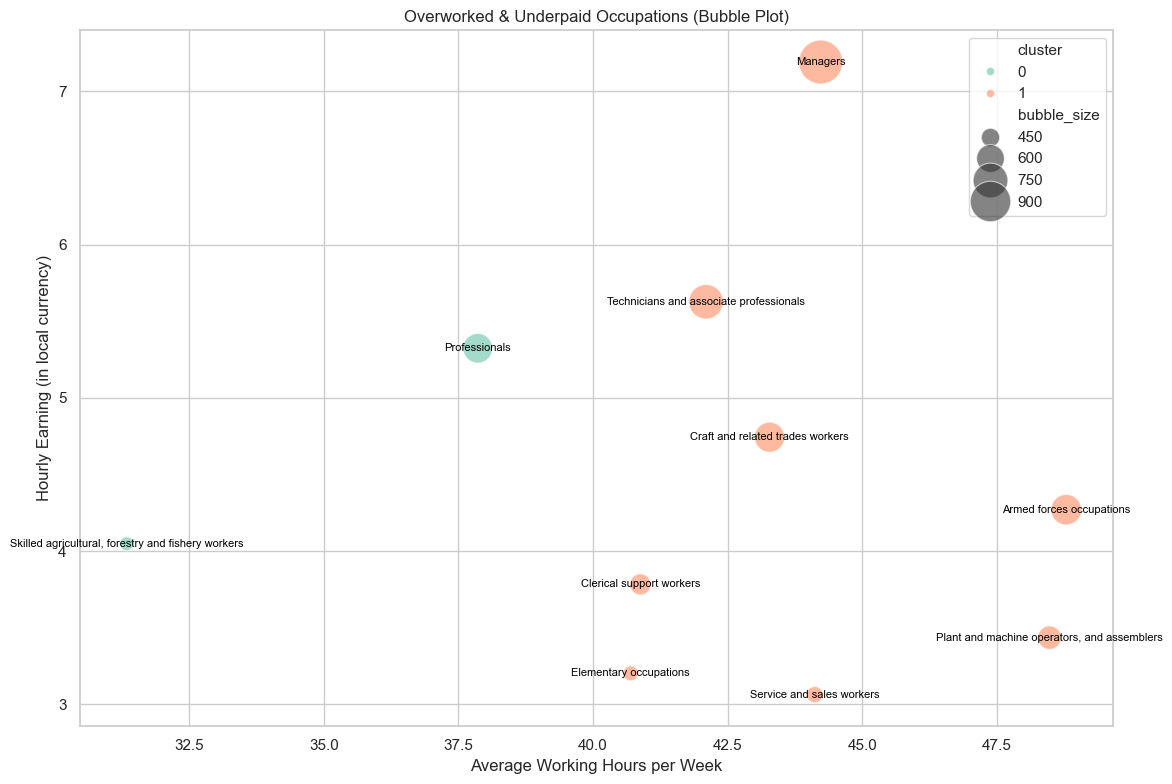

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset
nepal_df_2017 = nepal_df[(nepal_df['time'] == 2017) & (nepal_df['sex.label'] == ' Total')].copy()

# Scale bubble size
nepal_df_2017['bubble_size'] = nepal_df_2017['earnings'] / nepal_df_2017['earnings'].max() * 1000

# Set plot style
sns.set(style="whitegrid")

# Create plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=nepal_df_2017,
    x='working_hours',
    y='hourly_earning',
    size='bubble_size',
    hue='cluster',
    sizes=(100, 1000),
    alpha=0.6,
    legend='brief',
    palette='Set2'
)



# Annotate bubbles
for i, row in nepal_df_2017.iterrows():
    plt.text(
        row['working_hours'],
        row['hourly_earning'],
        row['occupation'],
        fontsize=8,
        ha='center',
        va='center',
        color='black'
    )

# Plot labels
plt.xlabel("Average Working Hours per Week")
plt.ylabel("Hourly Earning (in local currency)")
plt.title("Overworked & Underpaid Occupations (Bubble Plot)")

plt.tight_layout()
plt.show()


In [220]:
nepal_df_2017

,ref_area.label,sex.label,occupation,time,working_hours,earnings,hourly_earning,cluster,bubble_size
17665,Nepal,Total,Managers,2017,44.23,318.094,7.191816,1,1000.000000
17666,Nepal,Total,Professionals,2017,37.86,201.557,5.323745,0,633.639742
17667,Nepal,Total,Technicians and associate professionals,2017,42.10,236.904,5.627173,1,744.760983
17668,Nepal,Total,Clerical support workers,2017,40.88,154.632,3.782583,1,486.120455
17669,Nepal,Total,Service and sales workers,2017,44.12,135.147,3.063169,1,424.864977
17670,Nepal,Total,"Skilled agricultural, forestry and fishery wor...",2017,31.34,126.862,4.047926,0,398.819217
17671,Nepal,Total,Craft and related trades workers,2017,43.28,205.286,4.743207,1,645.362692
17672,Nepal,Total,"Plant and machine operators, and assemblers",2017,48.48,166.524,3.434901,1,523.505630
17673,Nepal,Total,Elementary occupations,2017,40.70,130.323,3.202039,1,409.699649
17674,Nepal,Total,Armed forces occupations,2017,48.79,208.330,4.269932,1,654.932190
